# Happy Data Analysis and Classification

This notebook performs Exploratory Data Analysis (EDA) on the `happydata.csv` dataset and builds classification models to predict happiness.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Data Loading and Loading

In [43]:
df = pd.read_csv('happydata.csv')
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


### Data Cleaning
Renaming the column `ëvents` to `events` for easier access.

In [45]:
df.rename(columns={'ëvents': 'events'}, inplace=True)
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'events', 'happy'],
      dtype='object')

In [46]:
# Check for missing values
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
events           0
happy            0
dtype: int64

## 2. Exploratory Data Analysis (EDA)

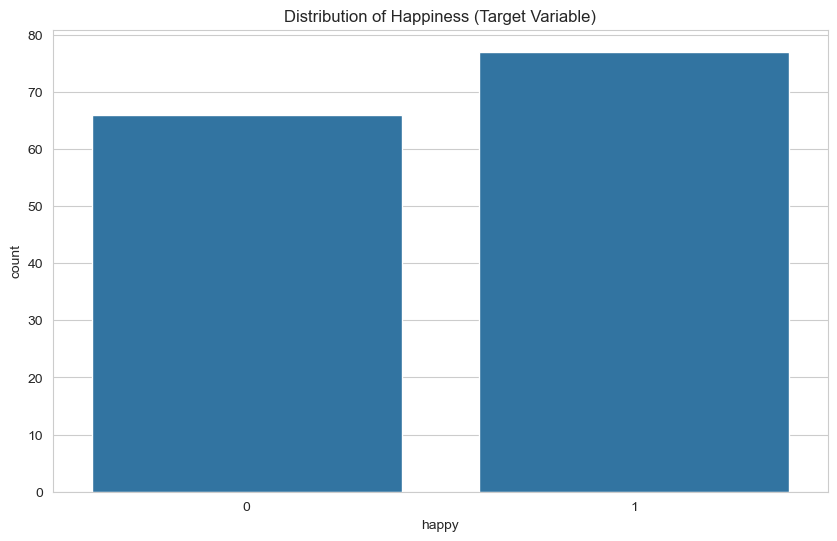

In [47]:
# Target Variable Distribution
sns.countplot(x='happy', data=df)
plt.title('Distribution of Happiness (Target Variable)')
plt.show()

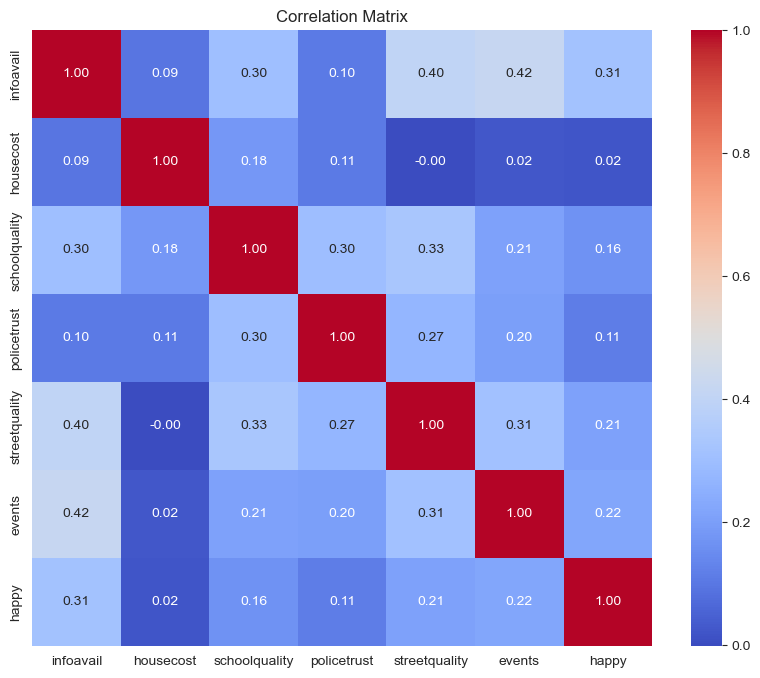

In [48]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


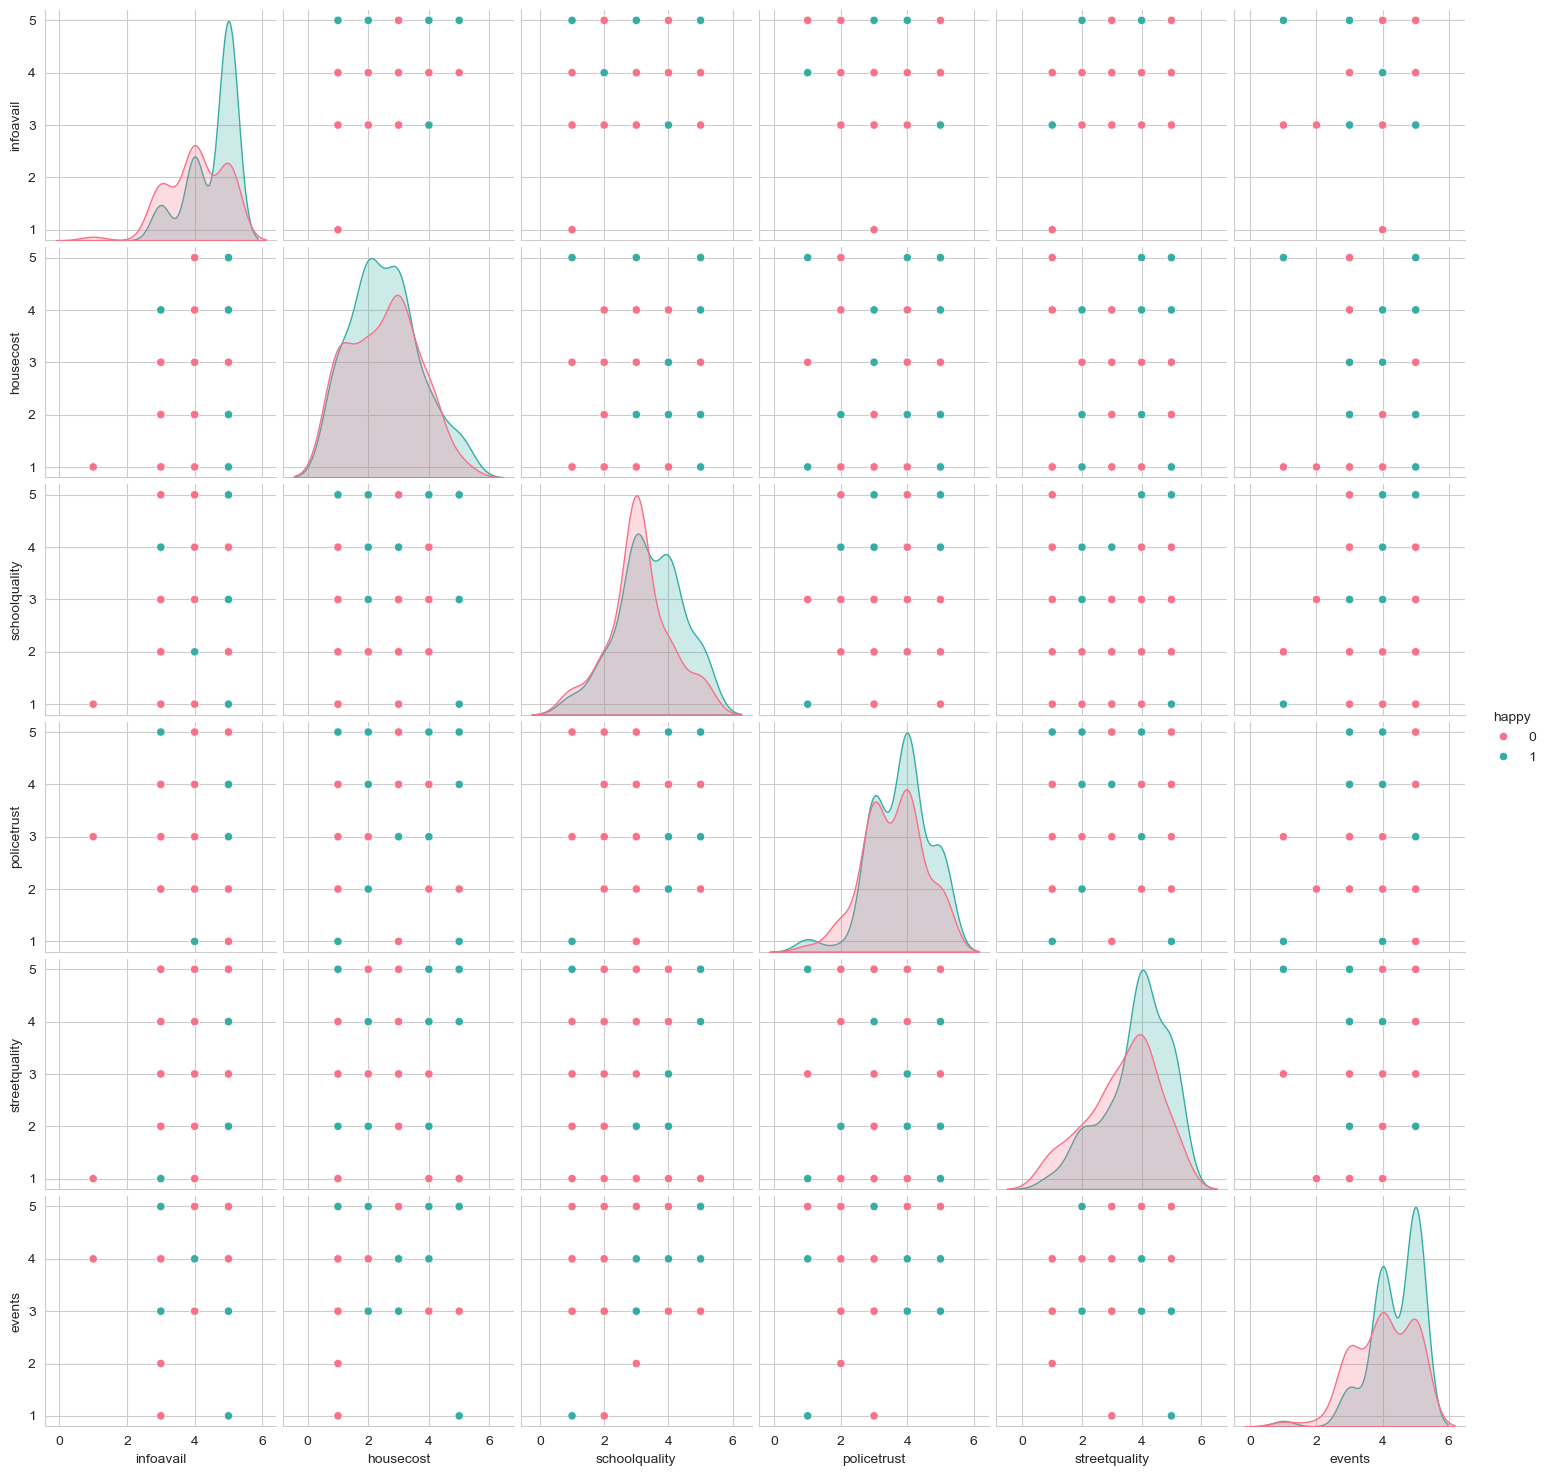

In [49]:
# Pairplot to see relationships
sns.pairplot(df, hue='happy', palette='husl')
plt.show()


## 3. Model Building

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
import joblib

# Splitting Data
X = df.drop('happy', axis=1)
y = df['happy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (114, 6)
Test shape: (29, 6)


In [51]:
# Dictionary to store model results
model_results = {}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

best_model_name = None
best_f1 = 0
best_model_obj = None

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_results[name] = {'Accuracy': acc, 'F1 Score': f1}
    print(f"{name}: Accuracy={acc:.4f}, F1={f1:.4f}")
    
    # Track best model based on F1 Score
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_model_obj = model

Logistic Regression: Accuracy=0.5517, F1=0.6286
Decision Tree: Accuracy=0.5517, F1=0.4800
Random Forest: Accuracy=0.5517, F1=0.5517
SVM: Accuracy=0.5172, F1=0.6316
Gradient Boosting: Accuracy=0.5172, F1=0.5333
AdaBoost: Accuracy=0.5862, F1=0.6000


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [52]:
# Compare Models
results_df = pd.DataFrame(model_results).T
results_df.sort_values(by='F1 Score', ascending=False)

,Accuracy,F1 Score
SVM,0.517241,0.631579
Logistic Regression,0.551724,0.628571
AdaBoost,0.586207,0.600000
Random Forest,0.551724,0.551724
Gradient Boosting,0.517241,0.533333
Decision Tree,0.551724,0.480000


In [53]:
print(f"Best Model: {best_model_name} with F1 Score: {best_f1:.4f}")

# Save the best model
joblib.dump(best_model_obj, 'best_happy_model.pkl')
print("Best model saved as 'best_happy_model.pkl'")

Best Model: SVM with F1 Score: 0.6316
Best model saved as 'best_happy_model.pkl'
